In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('../saves/PokemonsForModel.csv')

In [3]:
num_types = df.select_dtypes(include=['int64', 'float64'])
num_types


,Pokedex number,Catch Rate,Hatch Time (Cycles),Height (m),Weight (kg),Base Experience Yield,Base Friendship,Male Ratio,Female Ratio,Gen,Pseudo Legendary,Legendary,Mythical,Ultra Beast,Paradox,HP EV,Atk EV,Def EV,Sp.Atk EV,Sp.Def EV,Speed EV,Total EV Yield,Total Base Stat,HP Stat,Atk Stat,Def Stat,Sp.Atk Stat,Sp.Def Stat,Speed Stat,Normal,Poison,Ground,Rock,Bug,Ghost,Steel,Dragon,Dark,Flying,Fire,Psychic,Ice,Fighting,Water,Grass,Electric,Fairy
0,1,45,20,0.7,6.9,64,70,0.875,0.125,1,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,318,45,49,49,65,65,45,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,2.00,2.0,0.5,0.5,0.25,0.50,0.5
1,2,45,20,1.0,13.0,141,70,0.875,0.125,1,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,2,405,60,62,63,80,80,60,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,2.00,2.0,0.5,0.5,0.25,0.50,0.5
2,3,45,20,2.0,100.0,208,70,0.875,0.125,1,0.0,0.0,0.0,0.0,0.0,0,0,0,2,1,0,3,525,80,82,83,100,100,80,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,1.0,2.00,1.0,0.5,0.5,0.25,0.50,0.5
3,4,45,20,0.6,8.5,65,70,0.875,0.125,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,309,39,52,43,60,50,65,1.0,1.00,2.0,2.0,0.50,1.0,0.5,1.0,1.0,1.0,0.5,1.00,0.5,1.0,2.0,0.50,1.00,0.5
4,5,45,20,1.1,19.0,142,70,0.875,0.125,1,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,1,2,405,58,64,58,80,65,80,1.0,1.00,2.0,2.0,0.50,1.0,0.5,1.0,1.0,1.0,0.5,1.00,0.5,1.0,2.0,0.50,1.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,10,50,5.2,480.0,295,0,0.000,0.000,9,0.0,0.0,0.0,0.0,1.0,0,0,0,3,0,0,3,590,125,73,91,137,89,75,1.0,1.00,2.0,1.0,1.00,1.0,0.5,2.0,1.0,0.5,0.5,1.00,2.0,1.0,0.5,0.50,0.25,2.0
1021,1022,10,50,1.5,162.5,295,0,0.000,0.000,9,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,3,3,590,90,120,80,68,108,124,0.5,0.50,2.0,1.0,2.00,2.0,2.0,1.0,2.0,0.5,0.5,0.50,1.0,1.0,2.0,2.00,1.00,1.0
1022,1023,10,50,1.6,156.0,295,0,0.000,0.000,9,0.0,0.0,0.0,0.0,1.0,0,0,0,3,0,0,3,590,90,72,100,122,108,98,0.5,0.00,2.0,0.5,1.00,2.0,0.5,0.5,2.0,0.5,2.0,0.25,0.5,1.0,1.0,0.50,1.00,0.5
1023,1024,255,5,0.2,6.5,90,50,0.500,0.500,9,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,1,450,90,65,85,65,85,60,1.0,1.00,1.0,1.0,1.00,0.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,2.0,1.0,1.00,1.00,1.0


In [4]:
df

,Pokedex number,Name,Category,Abilities,Catch Rate,Egg Groups,Hatch Time (Cycles),Height (m),Weight (kg),Base Experience Yield,Levelling Rate,Base Friendship,Male Ratio,Female Ratio,Locations,Moves,Gen,Evolves From,Pseudo Legendary,Legendary,Mythical,Ultra Beast,Paradox,HP EV,Atk EV,Def EV,Sp.Atk EV,Sp.Def EV,Speed EV,Total EV Yield,Total Base Stat,HP Stat,Atk Stat,Def Stat,Sp.Atk Stat,Sp.Def Stat,Speed Stat,Normal,Poison,Ground,Rock,Bug,Ghost,Steel,Dragon,Dark,Flying,Fire,Psychic,Ice,Fighting,Water,Grass,Electric,Fairy,Type1,Type2
0,1,Bulbasaur,Seed Pokémon,"['Chlorophyll', 'Overgrow']",45,"['Monster', 'Grass']",20,0.7,6.9,64,Medium Slow,70,0.875,0.125,{'Red': 'First partner Pokémon from Professor ...,"['Tackle', 'Growl', 'Vine Whip', 'Growth', 'Le...",1,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,318,45,49,49,65,65,45,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,2.00,2.0,0.5,0.5,0.25,0.50,0.5,Grass,Poison
1,2,Ivysaur,Seed Pokémon,"['Chlorophyll', 'Overgrow']",45,"['Monster', 'Grass']",20,1.0,13.0,141,Medium Slow,70,0.875,0.125,"{'Red': 'Evolve Bulbasaur', 'Blue': 'Evolve Bu...","['Tackle', 'Growl', 'Vine Whip', 'Growth', 'Le...",1,Bulbasaur,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,2,405,60,62,63,80,80,60,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,2.00,2.0,0.5,0.5,0.25,0.50,0.5,Grass,Poison
2,3,Venusaur,Seed Pokémon,"['Chlorophyll', 'Overgrow', 'Thick Fat']",45,"['Monster', 'Grass']",20,2.0,100.0,208,Medium Slow,70,0.875,0.125,"{'Red': 'Evolve Ivysaur', 'Blue': 'Evolve Ivys...","['Petal Dance', 'Tackle', 'Growl', 'Vine Whip'...",1,Ivysaur,0.0,0.0,0.0,0.0,0.0,0,0,0,2,1,0,3,525,80,82,83,100,100,80,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,1.0,2.00,1.0,0.5,0.5,0.25,0.50,0.5,Grass,Poison
3,4,Charmander,Lizard Pokémon,"['Blaze', 'Solar Power']",45,"['Monster', 'Dragon']",20,0.6,8.5,65,Medium Slow,70,0.875,0.125,{'Red': 'First partner Pokémon from Professor ...,"['Scratch', 'Growl', 'Ember', 'Smokescreen', '...",1,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,309,39,52,43,60,50,65,1.0,1.00,2.0,2.0,0.50,1.0,0.5,1.0,1.0,1.0,0.5,1.00,0.5,1.0,2.0,0.50,1.00,0.5,Fire,NaN
4,5,Charmeleon,Flame Pokémon,"['Blaze', 'Solar Power']",45,"['Monster', 'Dragon']",20,1.1,19.0,142,Medium Slow,70,0.875,0.125,"{'Red': 'Evolve Charmander', 'Blue': 'Evolve C...","['Scratch', 'Growl', 'Ember', 'Smokescreen', '...",1,Charmander,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,1,2,405,58,64,58,80,65,80,1.0,1.00,2.0,2.0,0.50,1.0,0.5,1.0,1.0,1.0,0.5,1.00,0.5,1.0,2.0,0.50,1.00,0.5,Fire,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,Paradox Pokémon,['Protosynthesis'],10,No Eggs Discovered,50,5.2,480.0,295,Slow,0,0.000,0.000,"{'Scarlet': 'TradeVersion 3.0.0+', 'Violet': '...","['Twister', 'Sunny Day', 'Shock Wave', 'Stomp'...",9,NaN,0.0,0.0,0.0,0.0,1.0,0,0,0,3,0,0,3,590,125,73,91,137,89,75,1.0,1.00,2.0,1.0,1.00,1.0,0.5,2.0,1.0,0.5,0.5,1.00,2.0,1.0,0.5,0.50,0.25,2.0,Electric,Dragon
1021,1022,Iron Boulder,Paradox Pokémon,['Quark Drive'],10,No Eggs Discovered,50,1.5,162.5,295,Slow,0,0.000,0.000,"{'Scarlet': 'TradeVersion 3.0.0+', 'Violet': '...","['Horn Attack', 'Leer', 'Rock Throw', 'Electri...",9,NaN,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,3,3,590,90,120,80,68,108,124,0.5,0.50,2.0,1.0,2.00,2.0,2.0,1.0,2.0,0.5,0.5,0.50,1.0,1.0,2.0,2.00,1.00,1.0,Rock,Psychic
1022,1023,Iron Crown,Paradox Pokémon,['Quark Drive'],10,No Eggs Discovered,50,1.6,156.0,295,Slow,0,0.000,0.000,"{'Scarlet': 'TradeVersion 3.0.0+', 'Violet': '...","['Leer', 'Electric Terrain', 'Confusion', 'Met...",9,NaN,0.0,0.0,0.0,0.0,1.0,0,0,0,3,0,0,3,590,90,72,100,122,108,98,0.5,0.00,2.0,0.5,1.00,2.0,0.5,0.5,2.0,0.5,2.0,0.25,0.5,1.0,1.0,0.50,1.00,0.5,Steel,Psychic
1023,1024,Terapagos,Tera Pokémon,"['Teraform Zero', 'Tera Shell', 'Tera Shift']",255,No Eggs Discovered,5,0.2,6.5,90,Slow,50,0.500,0.500,"{'Scarlet': 'TradeVersion 3.0.0+', 'Violet': '..

In [5]:
X = df.drop(['Pokedex number', 'Catch Rate'], axis=1)
X = X[['Hatch Time (Cycles)', 'Height (m)', 'Weight (kg)', 'Base Experience Yield', 'Base Friendship', 'Male Ratio', 'Female Ratio', 'Pseudo Legendary', 'Legendary', 'Mythical', 'Ultra Beast', 'Paradox', 'Total EV Yield', 'Total Base Stat', 'Normal', 'Poison', 'Ground', 'Rock', 'Bug', 'Ghost', 'Steel', 'Dragon', 'Dark', 'Flying', 'Fire', 'Psychic', 'Ice', 'Fighting', 'Water', 'Grass', 'Electric', 'Fairy']]

In [6]:
X

,Hatch Time (Cycles),Height (m),Weight (kg),Base Experience Yield,Base Friendship,Male Ratio,Female Ratio,Pseudo Legendary,Legendary,Mythical,Ultra Beast,Paradox,Total EV Yield,Total Base Stat,Normal,Poison,Ground,Rock,Bug,Ghost,Steel,Dragon,Dark,Flying,Fire,Psychic,Ice,Fighting,Water,Grass,Electric,Fairy
0,20,0.7,6.9,64,70,0.875,0.125,0.0,0.0,0.0,0.0,0.0,1,318,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,2.00,2.0,0.5,0.5,0.25,0.50,0.5
1,20,1.0,13.0,141,70,0.875,0.125,0.0,0.0,0.0,0.0,0.0,2,405,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,2.00,2.0,0.5,0.5,0.25,0.50,0.5
2,20,2.0,100.0,208,70,0.875,0.125,0.0,0.0,0.0,0.0,0.0,3,525,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,1.0,2.00,1.0,0.5,0.5,0.25,0.50,0.5
3,20,0.6,8.5,65,70,0.875,0.125,0.0,0.0,0.0,0.0,0.0,1,309,1.0,1.00,2.0,2.0,0.50,1.0,0.5,1.0,1.0,1.0,0.5,1.00,0.5,1.0,2.0,0.50,1.00,0.5
4,20,1.1,19.0,142,70,0.875,0.125,0.0,0.0,0.0,0.0,0.0,2,405,1.0,1.00,2.0,2.0,0.50,1.0,0.5,1.0,1.0,1.0,0.5,1.00,0.5,1.0,2.0,0.50,1.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,50,5.2,480.0,295,0,0.000,0.000,0.0,0.0,0.0,0.0,1.0,3,590,1.0,1.00,2.0,1.0,1.00,1.0,0.5,2.0,1.0,0.5,0.5,1.00,2.0,1.0,0.5,0.50,0.25,2.0
1021,50,1.5,162.5,295,0,0.000,0.000,0.0,0.0,0.0,0.0,1.0,3,590,0.5,0.50,2.0,1.0,2.00,2.0,2.0,1.0,2.0,0.5,0.5,0.50,1.0,1.0,2.0,2.00,1.00,1.0
1022,50,1.6,156.0,295,0,0.000,0.000,0.0,0.0,0.0,0.0,1.0,3,590,0.5,0.00,2.0,0.5,1.00,2.0,0.5,0.5,2.0,0.5,2.0,0.25,0.5,1.0,1.0,0.50,1.00,0.5
1023,5,0.2,6.5,90,50,0.500,0.500,0.0,1.0,0.0,0.0,0.0,1,450,1.0,1.00,1.0,1.0,1.00,0.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,2.0,1.0,1.00,1.00,1.0


In [7]:
X.to_csv('../saves/ModelDataset.csv')

In [8]:
X.columns

Index(['Hatch Time (Cycles)', 'Height (m)', 'Weight (kg)', 'Base Experience Yield', 'Base Friendship', 'Male Ratio', 'Female Ratio', 'Pseudo Legendary', 'Legendary', 'Mythical', 'Ultra Beast', 'Paradox', 'Total EV Yield', 'Total Base Stat', 'Normal', 'Poison', 'Ground', 'Rock', 'Bug', 'Ghost', 'Steel', 'Dragon', 'Dark', 'Flying', 'Fire', 'Psychic', 'Ice', 'Fighting', 'Water', 'Grass', 'Electric', 'Fairy'], dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = df['Catch Rate']
Xval=X.values
yval=y.values


In [11]:
X_train, X_test, y_train, y_test = train_test_split(Xval, yval, test_size=0.20)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

2024-07-17 13:59:42.455605: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-17 13:59:42.899991: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-17 13:59:43.312448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 13:59:43.803290: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 13:59:43.804818: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 13:59:44.019020: I tensorflow/core/platform/cpu_feature_guard.cc:

In [16]:
model = Sequential()

In [17]:
model.add(Dense(32,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 12842.9863 - val_loss: 17612.1699
Epoch 2/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12988.1367 - val_loss: 17495.0566
Epoch 3/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13599.0801 - val_loss: 17138.5859
Epoch 4/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14113.6035 - val_loss: 16143.2959
Epoch 5/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12749.2051 - val_loss: 13549.2568
Epoch 6/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9615.8467 - val_loss: 9924.7266
Epoch 7/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7578.9302 - val_loss: 7954.7847
Epoch 8/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6180.3740 - val_loss: 7626.9541
Epoch 9/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6235.1040 - val_loss: 7242.1396
Epoch 10/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6264.4824 - val_loss: 6791.5303
Epoch 11/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6256.38

<Axes: >

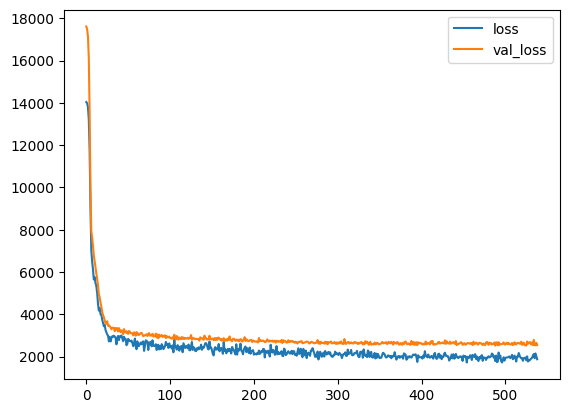

In [19]:
hist = pd.DataFrame(history.history)
hist.plot()


In [20]:
predictions = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [21]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error

In [22]:
print("Mean Absolute Error: ",mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("Root Mean Squared Error: ", root_mean_squared_error(y_test, predictions))

Mean Absolute Error:  32.12700915918118
Mean Squared Error:  2544.0369661740215
Root Mean Squared Error:  50.43844730137935


In [23]:
model.save('../saves/Model.keras')

In [24]:
ydf = pd.DataFrame(y_test)
preddf = pd.DataFrame(predictions)

In [25]:
res = pd.concat([ydf, preddf], axis=1)
res.columns = ['y_test', 'predictions']
res['diff'] = abs(ydf - preddf)

In [26]:
res[:100]

,y_test,predictions,diff
0,5,21.640781,16.640781
1,70,64.495583,5.504417
2,45,5.228743,39.771257
3,45,72.934296,27.934296
4,30,36.335373,6.335373
5,30,63.864819,33.864819
6,45,45.053688,0.053688
7,45,81.696533,36.696533
8,190,174.929001,15.070999
9,45,47.132027,2.132027
